## Setup

In [1]:
import os
os.chdir('../../../')
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ex=sl.ExpSys(600,Nucs=['1H','1H','1H'],vr=15000,pwdavg=2,LF=True)
dHC=.109
tetra=np.arccos(-1/3)
dHH=dHC*np.sqrt(2-2*np.cos(2*np.pi/3))
deltaHH=sl.Tools.dipole_coupling(dHH,'1H','1H')
ex.set_inter('CSA',i=0,delta=20)
for k in range(3):
    for j in range(k+1,3):
        euler=[0,np.pi/2,(k+j)*2*np.pi/3]
        ex.set_inter('dipole',i0=k,i1=j,delta=deltaHH,euler=euler)

<AxesSubplot:xlabel='t / ms', ylabel='<$^{1}H_z$>'>

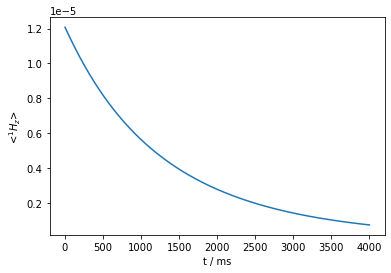

In [12]:
L=ex.Liouvillian()
L.add_SpinEx(i=[0,1,2],tc=1e-9)

seq=L.Sequence()
U=seq.U() # For big calculations, it's a good idea to save the propagator

<AxesSubplot:xlabel='t / ms', ylabel='<Op>'>

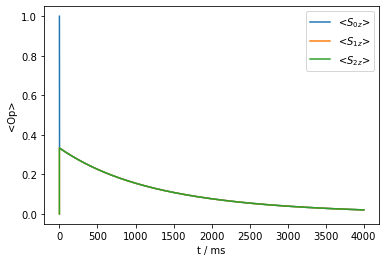

In [14]:
rho=sl.Rho('S0z',['S0z','S1z','S2z'])
rho.DetProp(U,n=60000)
rho.plot()